In [1]:
# Check scikit-learn version
import sklearn
# This is the version that will be used
print(sklearn.__version__)

0.23.2


In [2]:
from numpy import where
#from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib import pyplot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


In [3]:
import pandas as pd
df=pd.read_csv('Resources/Data/scaled_data.csv')
df=df.drop(columns=['Unnamed: 0','Happiness (Dystopia)' ], axis=1)
df.head(30)

,country_id,Happiness_Score,GDP,Social_Support,Life_Expectancy (Happiness),Freedom_Score,Generosity,Corruption_Score,Beer_Servings,Spirit_Servings,...,under-fivedeaths,Polio,Diphtheria,HIV/AIDS,GDP.1,Population,thinness1-19years,thinness5-9years,HDI,Schooling
0,0.000000,1.000000,0.929138,0.979132,0.936153,0.973512,-0.106092,0.208901,0.699468,0.356568,...,0.000000,0.979798,0.979798,0.010753,0.075068,0.021225,0.033708,0.029304,0.941983,0.833333
1,0.006494,0.979113,0.940905,0.980836,0.942685,0.975842,0.118077,0.180090,0.595745,0.217158,...,0.000000,0.939394,0.939394,0.010753,0.093974,0.022015,0.041199,0.032967,0.973629,0.941176
2,0.012987,0.968138,0.958889,0.967350,0.964818,0.944962,0.188903,0.324640,0.492021,0.268097,...,0.000000,0.979798,0.979798,0.010753,0.158959,0.032082,0.014981,0.010989,0.989451,0.784314
3,0.019481,0.961043,0.940779,1.000000,0.950464,0.973224,0.440450,0.760711,0.619681,0.163539,...,0.000000,0.929293,0.929293,0.010753,0.101397,0.000131,0.037453,0.032967,0.969409,0.931373
4,0.025974,0.958930,0.968310,0.977240,0.953078,0.980259,0.239952,0.281341,0.449468,0.190349,...,0.000000,0.959596,0.959596,0.010753,0.131824,0.002010,0.029963,0.025641,1.000000,0.867647
5,0.032468,0.953923,0.944285,0.963546,0.941362,0.931846,0.370297,0.389828,0.667553,0.235925,...,0.000909,0.959596,0.959596,0.010753,0.783191,0.065617,0.037453,0.032967,0.973629,0.887255
6,0.038961,0.941706,0.939577,0.950385,0.945266,0.963227,0.199076,0.268153,0.404255,0.160858,...,0.000000,0.989899,0.989899,0.010753,0.098759,0.037957,0.056180,0.051282,0.958861,0.779412
7,0.045455,0.934803,0.917058,0.973785,0.953102,0.960225,0.341734,0.236364,0.539894,0.211796,...,0.000000,0.929293,0.929293,0.010753,0.067579,0.049568,0.014981,0.010989,0.963080,0.941176
8,0.051948,0.934112,0.938182,0.952165,0.950497,0.923068,0.152372,0.534377,0.742021,0.201072,...,0.000000,0.939394,0.939394,0.010753,0.772105,0.033441,0.071161,0.076923,0.940928,0.779412
9,0.058442,0.926851,1.000000,0.930482,0.945256,0.928860,-0.008241,0.392358,0.627660,0.356568,...,0.000000,1.000000,1.000000,0.010753,0.021215,0.000221,0.037453,0.032967,0.945148,0.681373


In [4]:
df.corr().style.background_gradient()

,country_id,Happiness_Score,GDP,Social_Support,Life_Expectancy (Happiness),Freedom_Score,Generosity,Corruption_Score,Beer_Servings,Spirit_Servings,Wine_Servings,Total_L_Pure_Alcohol,Life_Expectancy (LED),Adult_Mortality,infantdeaths,GDP_Health_Gov_Expenditure (%),HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,HIV/AIDS,GDP.1,Population,thinness1-19years,thinness5-9years,HDI,Schooling
country_id,1.000000,-0.985334,-0.778944,-0.749944,-0.772084,-0.584948,-0.039093,0.392733,-0.539071,-0.359426,-0.532264,-0.494721,-0.744938,0.556868,0.242511,0.074579,-0.228652,0.161247,-0.461300,0.252646,-0.379366,-0.367083,0.472731,-0.460939,0.004881,0.547142,0.530978,-0.761187,-0.693053
Happiness_Score,-0.985334,1.000000,0.775445,0.764109,0.771219,0.592499,0.065331,-0.419593,0.538061,0.341646,0.536227,0.489242,0.742036,-0.569297,-0.246324,-0.080572,0.223995,-0.165692,0.464924,-0.253973,0.399783,0.362245,-0.475136,0.455381,-0.006814,-0.558550,-0.544194,0.761802,0.701895
GDP,-0.778944,0.775445,1.000000,0.782250,0.851443,0.423071,-0.122246,-0.335573,0.546706,0.395111,0.547392,0.526634,0.824718,-0.624344,-0.205920,-0.010646,0.283664,-0.070264,0.579350,-0.223760,0.489651,0.416380,-0.430658,0.487710,0.018256,-0.499835,-0.494329,0.897898,0.793026
Social_Support,-0.749944,0.764109,0.782250,1.000000,0.746707,0.482677,-0.054286,-0.212337,0.558448,0.459249,0.452101,0.518413,0.719766,-0.515775,-0.285906,-0.128867,0.256557,-0.134792,0.490300,-0.294968,0.411815,0.367047,-0.379339,0.396696,-0.005451,-0.565577,-0.551332,0.775145,0.699281
Life_Expectancy (Happiness),-0.772084,0.771219,0.851443,0.746707,1.000000,0.453230,-0.073388,-0.354834,0.472122,0.402451,0.540932,0.460289,0.945392,-0.769190,-0.264703,0.027118,0.385094,-0.076902,0.529175,-0.292047,0.532040,0.494070,-0.620344,0.452783,-0.064756,-0.546692,-0.542649,0.862449,0.790146
Freedom_Score,-0.584948,0.592499,0.423071,0.482677,0.453230,1.000000,0.251895,-0.421152,0.254851,0.090193,0.234728,0.197718,0.404540,-0.216020,-0.003773,-0.049933,0.189746,0.081127,0.095647,-0.016197,0.275055,0.289519,-0.206215,0.271877,0.007127,-0.244938,-0.222294,0.418739,0.369642
Generosity,-0.039093,0.065331,-0.122246,-0.054286,-0.073388,0.251895,1.000000,-0.276100,-0.251523,-0.131114,-0.072209,-0.173405,-0.110892,0.023829,0.086731,-0.022373,-0.011258,0.073776,-0.160737,0.089885,-0.139478,-0.018542,-0.016582,0.079798,0.211263,0.135642,0.129272,-0.147918,-0.138848
Corruption_Score,0.392733,-0.419593,-0.335573,-0.212337,-0.354834,-0.421152,-0.276100,1.000000,-0.141854,0.042956,-0.328477,-0.208367,-0.314497,0.247546,0.082104,0.092506,-0.127693,0.068507,-0.218117,0.087555,-0.220425,-0.186334,0.149487,-0.343396,0.064316,0.183507,0.182640,-0.321081,-0.319420
Beer_Servings,-0.539071,0.538061,0.546706,0.558448,0.472122,0.254851,-0.251523,-0.141854,1.000000,0.474127,0.546176,0.833575,0.474494,-0.228156,-0.213633,-0.034896,0.009203,-0.143041,0.331914,-0.220184,0.258505,0.133119,-0.131182,0.332001,-0.055168,-0.499008,-0.495869,0.574425,0.599165
Spirit_Servings,-0.359426,0.341646,0.395111,0.459249,0.402451,0.090193,-0.131114,0.042956,0.474127,1.000000,0.232426,0.635453,0.385029,-0.270927,-0.123839,0.038891,-0.005048,0.050817,0.340107,-0.141172,0.238345,0.063307,-0.295087,0.130578,-0.144158,-0.426575,-0.394778,0.444423,0.404055


In [5]:
columns_int=['GDP', 'Social_Support', 'Life_Expectancy (Happiness)', 'Freedom_Score', 'Beer_Servings', 'Wine_Servings','Life_Expectancy (LED)','HDI', 'Schooling']
X=df[columns_int[:3]].dropna()
len(X)

155

In [6]:
X

,GDP,Social_Support,Life_Expectancy (Happiness)
0,0.929138,0.979132,0.936153
1,0.940905,0.980836,0.942685
2,0.958889,0.967350,0.964818
3,0.940779,1.000000,0.950464
4,0.968310,0.977240,0.953078
...,...,...,...
150,0.578582,0.327762,0.588507
151,0.663725,0.554891,0.795510
152,0.686921,0.782925,0.724140
153,0.648464,0.568097,0.664023


Index(['GDP', 'Social_Support', 'Life_Expectancy (Happiness)', 'Freedom_Score',
       'Beer_Servings', 'Wine_Servings', 'Life_Expectancy (LED)', 'HDI',
       'Schooling'],
      dtype='object')
2 clusters silhouette_score: 0.4332963385224801
2 clusters km_score: -17.9812953032455


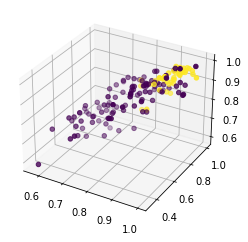

Index(['GDP', 'Social_Support', 'Life_Expectancy (Happiness)', 'Freedom_Score',
       'Beer_Servings', 'Wine_Servings', 'Life_Expectancy (LED)', 'HDI',
       'Schooling'],
      dtype='object')
3 clusters silhouette_score: 0.3393669536328905
3 clusters km_score: -12.800049848917647


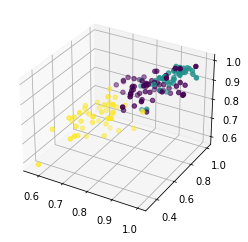

Index(['GDP', 'Social_Support', 'Life_Expectancy (Happiness)', 'Freedom_Score',
       'Beer_Servings', 'Wine_Servings', 'Life_Expectancy (LED)', 'HDI',
       'Schooling'],
      dtype='object')
4 clusters silhouette_score: 0.32537857105900025
4 clusters km_score: -10.13976103928069


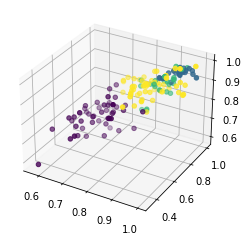

Index(['GDP', 'Social_Support', 'Life_Expectancy (Happiness)', 'Freedom_Score',
       'Beer_Servings', 'Wine_Servings', 'Life_Expectancy (LED)', 'HDI',
       'Schooling'],
      dtype='object')
5 clusters silhouette_score: 0.2587109106635704
5 clusters km_score: -9.120081493512226


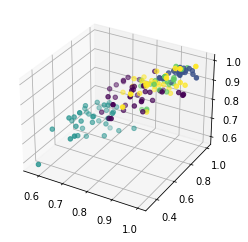

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import numpy as np
# X=df[np.random.choice(columns_int, replace=False, size=3)].dropna()
X=df[columns_int].dropna()
guess_list=[2, 3, 4, 5]
for each_guess in guess_list: 
    km=KMeans(n_clusters=each_guess)
    km.fit(X)
    labels=km.labels_
    ax=plt.axes(projection='3d')
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=labels)
    print(f'{X.columns}')
    print(f'{each_guess} clusters silhouette_score: {silhouette_score(X, labels)}')
    print(f'{each_guess} clusters km_score: {km.score(X, labels)}')
    plt.show()